In [6]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

214675     82500.0
749770     69591.0
229230    125000.0
711458     67500.0
546787    143000.0
250934     67500.0
442612     65000.0
413018     79500.0
534977    139860.0
423437     95000.0
Name: salary_year_avg, dtype: float64

<Axes: >

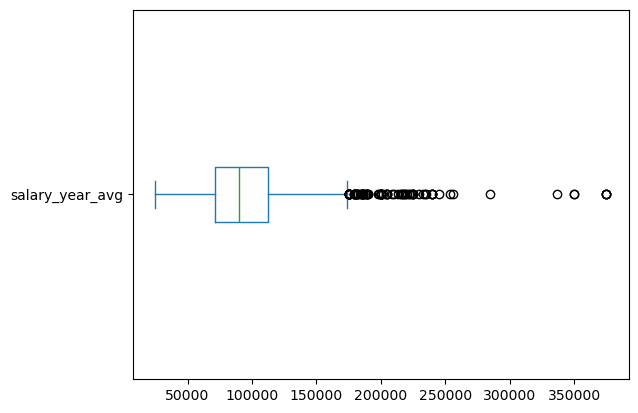

In [9]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False) #Si no pones vert se pone en vertical, con vert false pasa a ser horizontal o es al reves? :P

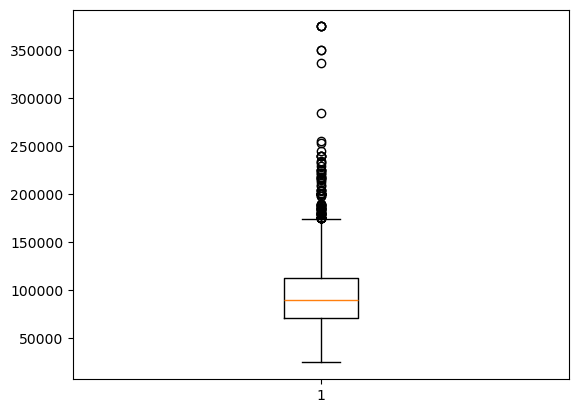

In [6]:
plt.boxplot(df_DA_US['salary_year_avg'])
plt.show()

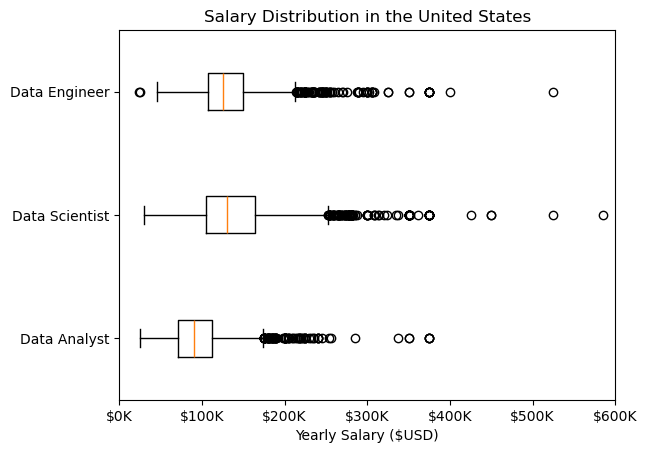

In [24]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

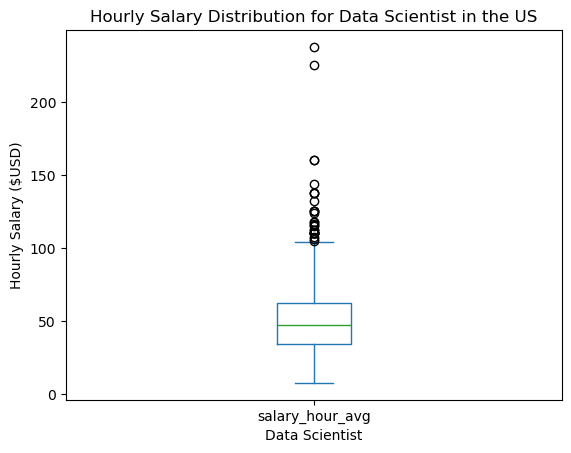

In [53]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_hour_avg'])

# Plot the boxplot
df_DS_US['salary_hour_avg'].plot(kind='box')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()

Text(0, 0.5, 'Hourly Salary ($USD)')

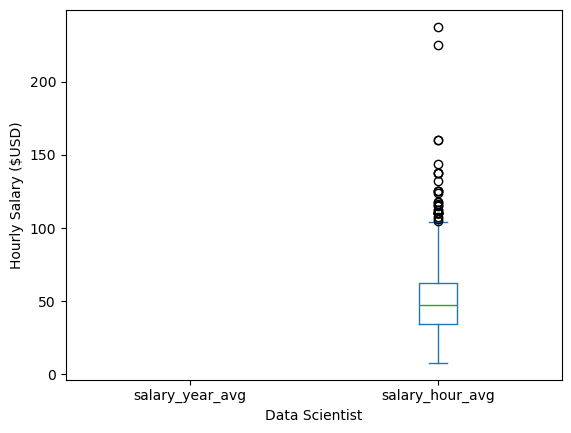

In [54]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset={'salary_hour_avg'})

df_DS_US = df_DS_US.dropna(subset=['salary_hour_avg'])

df_DS_US.plot(kind='box')

plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')

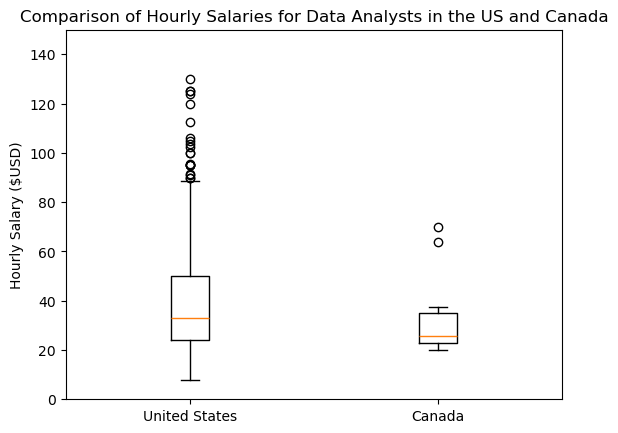

In [2]:
# Filter out data
countries = ['United States', 'Canada']
df_filtered = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_hour_avg'])

# Get list of DataFrames for each country
country_data = [df_filtered[df_filtered['job_country'] == country]['salary_hour_avg'] for country in countries]

# Plot chart
plt.boxplot(country_data, labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

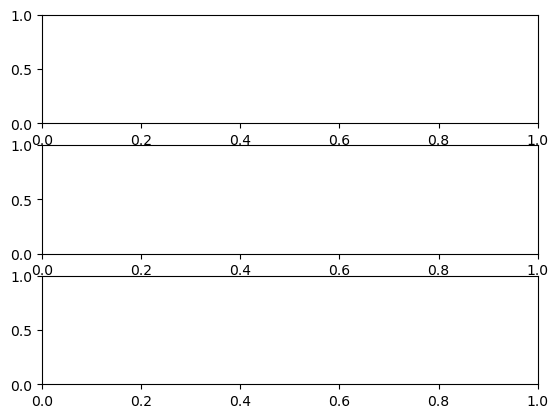

In [13]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_filtered = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].dropna(subset=['salary_hour_avg'])

fig, ax = plt.subplots(3, 1)

ax.boxplot(df_filtered)

ax.set_xticklabels([job_titles])

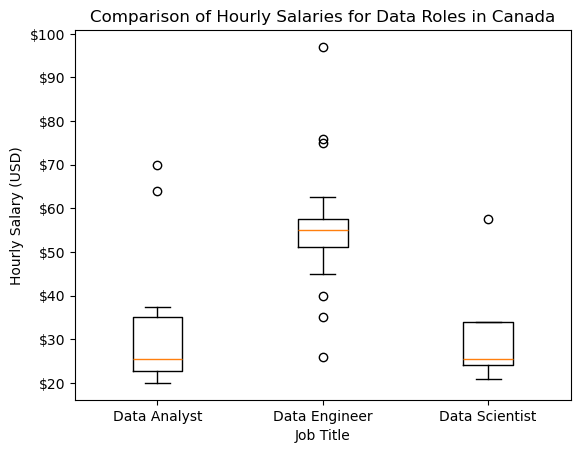

In [14]:
# Filter out data
df_Canada = df[df['job_country'] == 'Canada'].dropna(subset=['salary_hour_avg'])
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_list = [df_Canada[df_Canada['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]

# Plot charts
fig, ax = plt.subplots()
ax.boxplot(job_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()